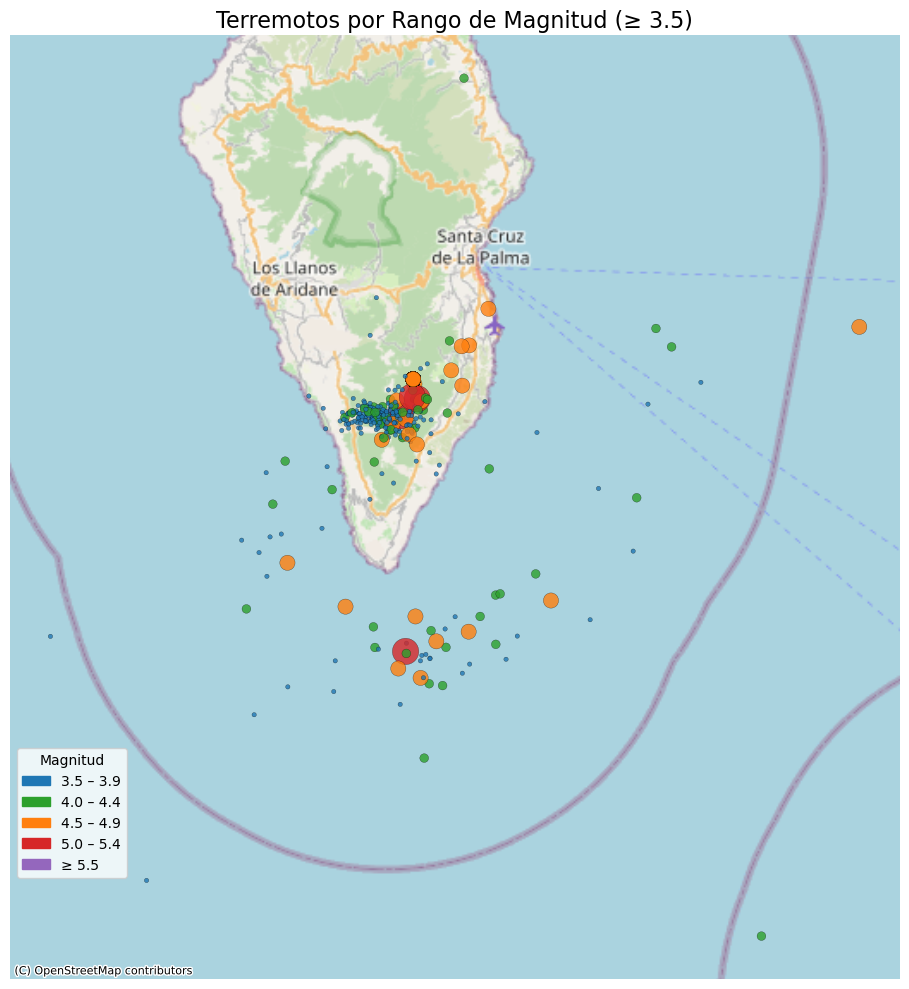

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import matplotlib.patches as mpatches

# Carga de datos
gdf = gpd.read_file("terremotos.geojson")

if gdf.geometry.isnull().all():
    gdf["geometry"] = [Point(xy) for xy in zip(gdf["Longitude"], gdf["Latitude"])]
    gdf = gpd.GeoDataFrame(gdf, geometry="geometry", crs="EPSG:4326")

# Filtrado por magnitud
gdf = gdf[gdf["Magnitud"] > 3.5]

# Reproyección
gdf = gdf.to_crs(epsg=3857)

# Color y tamaño
def definir_estilo(m):
    if m < 4.0:
        return "#1f77b4", 10     # Azul
    elif m < 4.5:
        return "#2ca02c", 40     # Verde
    elif m < 5.0:
        return "#ff7f0e", 120   # Naranja
    elif m < 5.5:
        return "#d62728", 360  # Rojo
    else:
        return "#9467bd", 1080   # Púrpura

gdf[["color", "size"]] = gdf["Magnitud"].apply(lambda m: pd.Series(definir_estilo(m)))

# Mapa
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(
    ax=ax,
    color=gdf["color"],
    markersize=gdf["size"],
    alpha=0.8,
    edgecolor="black",
    linewidth=0.2
)

ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_title("Terremotos por Rango de Magnitud (≥ 3.5)", fontsize=16)
ax.axis("off")

# Leyenda
leyenda = [
    mpatches.Patch(color="#1f77b4", label="3.5 – 3.9"),
    mpatches.Patch(color="#2ca02c", label="4.0 – 4.4"),
    mpatches.Patch(color="#ff7f0e", label="4.5 – 4.9"),
    mpatches.Patch(color="#d62728", label="5.0 – 5.4"),
    mpatches.Patch(color="#9467bd", label="≥ 5.5"),
]
ax.legend(handles=leyenda, title="Magnitud", loc="lower left", bbox_to_anchor=(0.0, 0.1))

plt.tight_layout()
plt.savefig("mapa_terremotos_mag3_colores_tamanos.png", dpi=300)
plt.show()

Esta visualización representa los terremotos registrados con magnitud superior a 3.5, utilizando la técnica de Dot Density Map. Cada evento sísmico es representado como un punto geolocalizado sobre el territorio, sin agregación espacial, lo que permite preservar la granularidad del dato original. Esta técnica es especialmente adecuada para fenómenos puntuales y distribuidos geográficamente, como es el caso de los terremotos, ya que permite visualizar su dispersión, concentración y jerarquía sin perder precisión.

Se ha empleado una proyección Web Mercator (EPSG:3857), que es estándar en visualizaciones web y compatibles con servicios de mapas base como OpenStreetMap. Aunque no es la proyección más precisa para análisis geodésicos, su uso aquí es plenamente justificado al priorizar la integración con mapas de fondo y la interpretación visual por parte del usuario.

Para facilitar la lectura del mapa, se ha incorporado un mapa base (OpenStreetMap) mediante contextily, que aporta contexto geográfico reconocible (costas, islas, relieve urbano) sin distraer del contenido principal. Esto permite al usuario situar con precisión las zonas afectadas, como el entorno de las Islas Canarias, sin necesidad de etiquetado adicional.

Cada punto está codificado mediante dos canales visuales redundantes:

Color, que representa el rango de magnitud del terremoto. Se ha utilizado una paleta perceptual secuencial (de azul a púrpura), inspirada en convenciones visuales para representar intensidad o severidad. Esta elección responde a criterios de diseño perceptual (mayor magnitud → color más cálido o intenso) y permite distinguir rápidamente entre eventos menores y mayores.

Tamaño, proporcional al valor de la magnitud según una escala discreta creciente. El tamaño se duplica entre intervalos (3.5–3.9, 4.0–4.4, ..., ≥5.5), reforzando visualmente la importancia relativa de cada evento sin provocar saturación visual.

La leyenda explicita claramente los intervalos de magnitud y sus correspondientes colores, favoreciendo la interpretabilidad sin necesidad de recurrir a la escala numérica exacta de cada punto.

El objetivo principal de la visualización es explorar patrones espaciales de actividad sísmica y distinguir regiones más propensas a terremotos de alta magnitud. La técnica de Dot Density Map, aplicada con color y tamaño codificados, permite reconocer rápidamente zonas de acumulación, diferenciar entre niveles de severidad y transmitir la dimensión espacial del fenómeno con precisión y claridad.

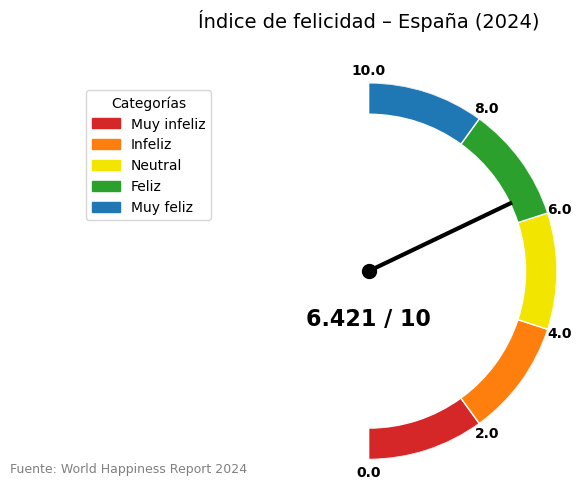

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Carga del dataset
df = pd.read_csv("World-happiness-report-2024.csv")
espana = df[df["Country name"] == "Spain"].iloc[0]
valor = espana["Ladder score"]
max_valor = 10

# Parámetros
num_secciones = 5
rangos = np.linspace(0, max_valor, num_secciones + 1)
# Paleta de colores (de menor a mayor felicidad)
colores = ['#d62728', '#ff7f0e', '#f2e600', '#2ca02c', '#1f77b4']
# Categorías para la leyenda
categorias = ["Muy infeliz", "Infeliz", "Neutral", "Feliz", "Muy feliz"]

# Ángulo del gauge en radianes
angle = -np.pi/2 + (valor / max_valor) * np.pi
needle_angle = angle

# Figura con proyección polar
fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={'projection': 'polar'})
ax.set_ylim(0, 12)

# Dibujar los segmentos del semicírculo
for i in range(num_secciones):
    start = -np.pi/2 + (rangos[i] / max_valor) * np.pi
    end = -np.pi/2 + (rangos[i+1] / max_valor) * np.pi
    ax.bar(x=(start + end)/2, height=2, width=(end - start), bottom=10,
           color=colores[i], edgecolor='white', align='center')

# Dibujar la aguja
ax.plot([needle_angle, needle_angle], [0, 10], color='black', linewidth=3)
ax.scatter(0, 0, color='black', s=100, zorder=11)

# Etiquetas de escala: se trasladan a un radio ligeramente mayor (12.5)
for i in range(num_secciones + 1):
    a = -np.pi/2 + (rangos[i] / max_valor) * np.pi
    ax.text(a, 12.8, f"{rangos[i]:.1f}", ha='center', va='center', fontsize=10, fontweight='bold')

# Quitar ticks y spines para un look más limpio
ax.set_xticks([])
ax.set_yticks([])
ax.spines.clear()

# Valor numérico del índice: se posiciona en la parte inferior central usando coordenadas de la figura
fig.text(0.5, 0.35, f"{valor:.3f} / 10", ha='center', va='center', fontsize=16, fontweight='bold', color='black')

# Fuente, en la parte inferior de la figura
fig.text(0.2, 0.05, "Fuente: World Happiness Report 2024", ha='center', va='center', fontsize=9, color='gray')

# Leyenda con categorías y colores, situada en la parte superior central fuera del semicírculo
patches = [mpatches.Patch(color=colores[i], label=categorias[i]) for i in range(num_secciones)]
ax.legend(handles=patches, title="Categorías", loc='upper right', bbox_to_anchor=(0.1, 1.0),
          fontsize=10, ncol=1)  # Cambiar ncol a 1 para que sea vertical

# Título del gráfico
plt.title("Índice de felicidad – España (2024)", fontsize=14, pad=40)
plt.tight_layout()
plt.savefig("gauge_felicidad_espana_2024_semicircular.png", dpi=300)
plt.show()

La visualización consiste en un Gauge Diagram semicircular (tipo velocímetro) que muestra el valor del “Ladder score” (índice de felicidad) de España, extraído del World Happiness Report 2024. En este caso, España presenta un valor de 6.421 sobre una escala de 0 a 10.

Elementos del gráfico y su justificación:

Diseño semicircular (velocímetro):
Se ha optado por un dial semicircular porque imita el estilo de los indicadores analógicos tradicionales (como los velocímetros de los automóviles), lo que resulta intuitivo para el usuario. Este formato permite transmitir rápidamente la noción de “progreso” o “estado actual” comparado con un objetivo o con la escala máxima.

Segmentación uniforme de la escala:
La escala de 0 a 10 se ha dividido en 5 segmentos iguales. Esto garantiza que cada intervalo de 2 unidades se represente con el mismo ancho angular, facilitando la comparación y evitando distorsiones visuales en la percepción de la progresión. Los segmentos igualmente espaciados ayudan al espectador a entender de forma directa en qué rango se ubica el valor (por ejemplo, si se sitúa en la parte baja, media o alta de la escala).

Paleta de colores definida:
Se ha empleado una paleta secuencial que va desde el rojo para los valores bajos, pasando por el naranja y verde claro, hasta llegar al azul para los valores altos. Esta elección sigue criterios de percepción: los colores cálidos (rojo y naranja) sugieren alertas o bajo nivel de bienestar, mientras que los colores fríos (verde y azul) se asocian a mejores resultados. De esta forma, el espectador puede identificar rápidamente que el valor de 6.421 se encuentra en el rango medio-alto (en nuestro diseño, entre el segmento naranja y el verde claro).

Aguja indicadora y valor central:
La aguja negra, calculada en coordenadas polares y posicionada en función del valor relativo (6.421/10), señala directamente en el dial la posición de España en la escala. Además, se ha colocado el número “6.421 / 10” en el centro del dial, en un tamaño destacado, para reforzar el mensaje y capturar la atención. Esta duplicidad (visual y numérica) asegura que el dato se perciba con claridad, sin ambigüedad.

Etiquetas de escala y anotaciones:
Se han añadido etiquetas numéricas en el borde del dial, correspondientes a los puntos de la escala (por ejemplo, 0, 2, 4, 6, 8, 10), lo que permite al usuario ubicar de forma precisa el valor en relación con el rango completo. Además, se incluye una pequeña anotación interpretativa ("Nivel de felicidad") y la fuente de los datos ("Fuente: World Happiness Report 2024"), lo que garantiza la transparencia y contextualiza la visualización.

Elección de la proyección polar y parámetros gráficos:
Se utiliza una proyección polar para crear el dial, lo que es coherente con el diseño circular del velocímetro. Los ajustes en el ángulo (mapeando la escala de -90° a +90°) y en el límite radial permiten que los sectores, la aguja y las etiquetas se dispongan de forma armoniosa, asegurando que la visualización sea tanto estéticamente atractiva como funcional.

Objetivo de la visualización:
El propósito es comunicar de forma rápida y efectiva el nivel de felicidad percibido en España, destacando visualmente su posición en la escala global. La técnica del Gauge Diagram, al representar un único indicador en un formato familiar, facilita la interpretación inmediata del dato, permitiendo a los usuarios identificar si el bienestar de España se sitúa en un rango bajo, medio o alto. La combinación de colores, segmentación equitativa y anotaciones contextuales ayuda a reforzar la narrativa del gráfico, convirtiéndolo en una herramienta eficaz para resaltar la situación actual y compararla con otros posibles valores o metas.

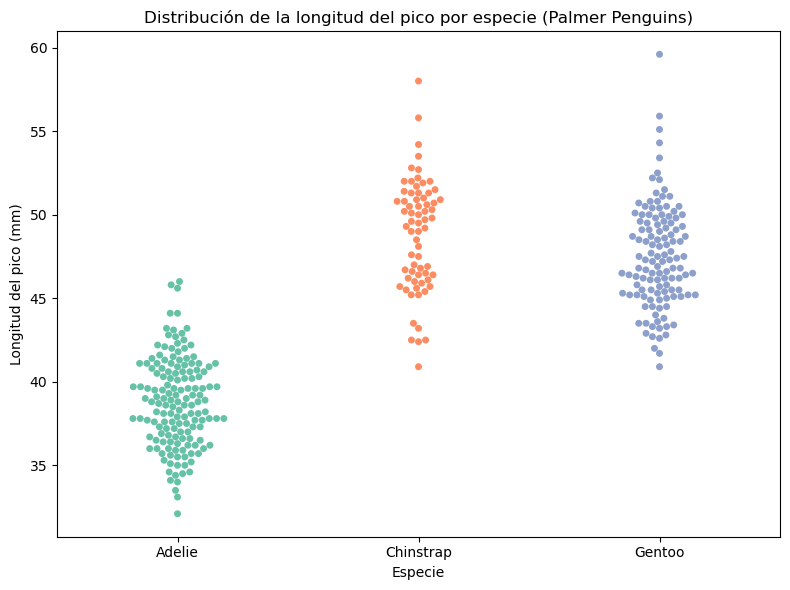

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carga del dataset
df = pd.read_csv("penguins.csv")

# Gestión valores faltantes
df_clean = df.dropna(subset=["bill_length_mm", "species"]).copy()

# Convertir 'species' a categórica
df_clean["species"] = df_clean["species"].astype("category")

# Beeswarm Plot usando hue para evitar warnings con la paleta
plt.figure(figsize=(8, 6))
sns.swarmplot(x="species", y="bill_length_mm", data=df_clean,
              hue="species", palette="Set2", dodge=False, legend=False)
plt.title("Distribución de la longitud del pico por especie (Palmer Penguins)")
plt.xlabel("Especie")
plt.ylabel("Longitud del pico (mm)")
plt.tight_layout()
plt.savefig("distribucion_longitud_pico_palmer_penguins.png", dpi=300)
plt.show()

Esta visualización utiliza un Beeswarm Plot para representar la distribución de la variable bill_length_mm (longitud del pico) de las diferentes especies de pingüinos presentes en el dataset Palmer Penguins. Cada punto en el gráfico representa una observación individual, lo que permite apreciar la variabilidad interna de cada grupo, identificar posibles outliers y comparar la dispersión de los datos entre las especies.

Elementos y justificación del diseño:

Selección del dataset y variable:
Se eligió el dataset Palmer Penguins debido a su tamaño moderado (alrededor de 300-400 registros), lo que facilita su manipulación y visualización sin requerir complejas tareas de limpieza de datos. La variable bill_length_mm es una medida continua y numérica, ideal para analizar la distribución individual de cada observación. Además, la variable categórica species permite agrupar los datos, facilitando comparaciones visuales directas entre las especies (Adelie, Chinstrap y Gentoo).

Técnica del Beeswarm Plot:
La técnica del beeswarm (o swarm plot) es especialmente útil para visualizar distribuciones de datos univariados, ya que evita la superposición de puntos mediante un algoritmo de dispersión controlada. Esto permite ver la densidad y distribución exacta de los valores sin perder la información individual, a diferencia de otros gráficos como el boxplot o el violin plot, donde se ocultan detalles importantes de la variabilidad.

Paleta de colores:
Se ha utilizado la paleta "Set2", una opción ampliamente reconocida por su armonía y facilidad para distinguir categorías. Esta paleta asegura que cada especie se identifique con un color diferente, facilitando la interpretación visual y evitando confusiones. La elección de colores claros y diferenciados contribuye a una lectura rápida y efectiva, lo cual es fundamental en visualización de datos.

Aspectos estéticos y funcionales:

Legibilidad: El beeswarm plot permite visualizar cada observación sin que se pierda en la superposición, lo que resulta clave para detectar outliers o patrones internos en la distribución de la longitud del pico.

Simplicidad y claridad: La visualización es sencilla y directa, permitiendo al espectador apreciar tanto la concentración de datos en ciertos rangos como la variabilidad intergrupal.

Adecuación a la técnica: Dado que el objetivo es demostrar la aplicabilidad del beeswarm plot para representar datos individuales en categorías, esta visualización logra resaltar la distribución de cada especie sin recurrir a agregaciones o resúmenes estadísticos que podrían ocultar detalles importantes.

Objetivo de comunicación:
El principal objetivo de esta visualización es descubrir y comunicar las diferencias en la longitud del pico entre las especies de pingüinos. Se busca evidenciar cómo varían estas medidas de manera individual dentro de cada grupo, lo que puede ser útil para estudios ecológicos, taxonómicos o incluso para la enseñanza de técnicas de análisis de datos. La representación gráfica permite identificar de forma intuitiva qué especies presentan una mayor dispersión en la longitud del pico, así como detectar posibles valores atípicos.

Contexto y justificación académica:
En el marco de la asignatura de Visualización de Datos, esta visualización se elige para demostrar la capacidad de aplicar técnicas novedosas a conjuntos de datos reales y de interpretar críticamente sus resultados. La elección de un beeswarm plot, junto con la paleta de colores cuidadosamente seleccionada y la estructura del dataset, ilustra cómo una representación visual adecuada puede revelar patrones y detalles que no se obtendrían con gráficos más convencionales. Además, se destaca la importancia de trabajar con datos abiertos, lo que facilita la replicación y el aprendizaje práctico.

Conclusión:
La técnica del beeswarm plot aplicada al dataset Palmer Penguins cumple con el objetivo de revelar la distribución y variabilidad de la longitud del pico por especie. Gracias a la correcta elección de la variable numérica y la categórica, la utilización de una paleta de colores adecuada y un diseño visual claro, la visualización resulta informativa y estéticamente agradable, permitiendo al espectador comprender de un vistazo las diferencias y características de cada grupo. Esta integración de técnicas visuales y análisis de datos representa un enfoque integral y fundamentado en los principios de la Visualización de Datos.